In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [61]:
data = pd.read_excel('../new_csv_files/full.xls')

In [62]:
road = pd.read_csv('./new_csv_files/Feb_IDMST_fin.csv')

In [63]:
road.shape

(503, 7)

In [64]:
lst = []
for i in data['city_ascii']:
    lst.append(i)

In [65]:
for i in road['City name']:
    lst.remove(i)

In [66]:
lst

[nan, 'Port Blair', 'Velugodu']

In [67]:
data.head()

,Number,city_ascii,Pixel 0,Unnamed: 3,Unnamed: 4,Pixel 10 (Tree Cover),Unnamed: 6,Unnamed: 7,Pixel 20 (Shrubland),Unnamed: 9,...,Unnamed: 28,Pixel 90 (Herbaceous wetland),Unnamed: 30,Unnamed: 31,Pixel 95 (Mangroves),Unnamed: 33,Unnamed: 34,Pixel 100 (Moss and lichen),Unnamed: 36,Unnamed: 37
0,NaN,NaN,PixelSum,Percentage %,Area,PixelSum,Percentage %,Area,PixelSum,Percentage %,...,Area,PixelSum,Percentage %,Area,PixelSum,Percentage %,Area,PixelSum,Percentage %,Area
1,1.0,New Delhi,0,0,0,453517,36.511823,4535.17,23845,1.919717,...,162.67,1,0.000081,0.01,0,0,0,0,0,0
2,2.0,Belgaum,1114,0.089686,11.14,192492,15.497178,1924.92,94349,7.595865,...,41.6,0,0,0,0,0,0,0,0,0
3,3.0,Gulbarga,0,0,0,21442,1.727806,214.42,29779,2.399605,...,20.65,1,0.000081,0.01,0,0,0,0,0,0
4,4.0,Jamnagar,0,0,0,47573,3.830015,475.73,42908,3.454444,...,735.98,3317,0.267046,33.17,19164,1.542859,191.64,0,0,0


In [68]:
for i in lst:
    data.drop(data[data['city_ascii'] == i].index, inplace=True)

In [69]:
data = data.drop([0])

In [70]:
data.iloc[:, 4]

1          0
2      11.14
3          0
4          0
5          0
       ...  
501        0
502        0
503        0
504        0
505    11.14
Name: Unnamed: 4, Length: 503, dtype: object

In [71]:
data.shape

(503, 38)

In [72]:
i = 4
area_df = data.iloc[:, 4].to_frame()
i += 3
while i <= 37:
    area_df = pd.concat([area_df, data.iloc[:, i]], axis=1)
    i += 3

In [73]:
area_df.shape

(503, 12)

In [74]:
area_df = area_df.reset_index()

In [75]:
area_df

,index,Unnamed: 4,Unnamed: 7,Unnamed: 10,Unnamed: 13,Unnamed: 16,Unnamed: 19,Unnamed: 22,Unnamed: 25,Unnamed: 28,Unnamed: 31,Unnamed: 34,Unnamed: 37
0,1,0,4535.17,238.45,176.86,389.13,6488.56,430.25,0,162.67,0.01,0,0
1,2,11.14,1924.92,943.49,824.89,5037.38,2808.2,829.48,0,41.6,0,0,0
2,3,0,214.42,297.79,271.15,5711.06,4160.53,1734.35,0,20.65,0.01,0,0
3,4,0,475.73,429.08,54.4,5269.83,3453.05,1778.22,0,735.98,33.17,191.64,0
4,5,0,332.83,967.91,788.12,5770.72,2877.96,1468.81,0,203.61,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,501,0,730.98,323.92,118.18,9788.96,355.02,760.08,0,330.29,2.53,0,0
499,502,0,775.15,3165.5,44.35,7944.7,108.41,382.6,0,0.39,0,0,0
500,503,0,849.92,991.08,365.69,5539.68,1051.88,2014.69,0,1585.78,4.39,6.85,0
501,504,0,4984.94,3199.2,132.11,2867.43,509.56,716.65,0,0.02,0.05,0,0


In [76]:
road.head()

,sl.num,Grid Number,City name,Road_length,Network Density,CA,population
0,1,G1,New Delhi,1898.331177,17.513924,4054.11,249998
1,2,G2,Belgaum,1313.717944,11.084396,1534.05,488157
2,3,G3,Gulbarga,1714.513607,14.574160,2377.14,483615
3,4,G4,Jamnagar,1454.757045,12.764563,2141.93,479920
4,5,G5,Dhulia,1164.130948,10.106350,1608.71,479073


In [77]:
road_data = road['Road_length']
lst_columns = ['Network Density ', 'CA', 'population', ]
for i in lst_columns:
    road_data = pd.concat([road_data, road[i]], axis=1)

In [78]:
road_data

,Road_length,Network Density,CA,population
0,1898.331177,17.513924,4054.11,249998
1,1313.717944,11.084396,1534.05,488157
2,1714.513607,14.574160,2377.14,483615
3,1454.757045,12.764563,2141.93,479920
4,1164.130948,10.106350,1608.71,479073
...,...,...,...,...
498,283.630819,2.378930,161.65,20623
499,118.032304,0.991091,84.72,20639
500,188.698617,1.660196,697.61,20338
501,546.621178,4.565212,281.76,20299


In [79]:
final_df = pd.concat([area_df, road_data], axis=1)

In [80]:
final_df.shape

(503, 17)

In [81]:
final_df.head()

,index,Unnamed: 4,Unnamed: 7,Unnamed: 10,Unnamed: 13,Unnamed: 16,Unnamed: 19,Unnamed: 22,Unnamed: 25,Unnamed: 28,Unnamed: 31,Unnamed: 34,Unnamed: 37,Road_length,Network Density,CA,population
0,1,0,4535.17,238.45,176.86,389.13,6488.56,430.25,0,162.67,0.01,0,0,1898.331177,17.513924,4054.11,249998
1,2,11.14,1924.92,943.49,824.89,5037.38,2808.2,829.48,0,41.6,0,0,0,1313.717944,11.084396,1534.05,488157
2,3,0,214.42,297.79,271.15,5711.06,4160.53,1734.35,0,20.65,0.01,0,0,1714.513607,14.574160,2377.14,483615
3,4,0,475.73,429.08,54.4,5269.83,3453.05,1778.22,0,735.98,33.17,191.64,0,1454.757045,12.764563,2141.93,479920
4,5,0,332.83,967.91,788.12,5770.72,2877.96,1468.81,0,203.61,0,0,0,1164.130948,10.106350,1608.71,479073


In [82]:
final_df = final_df.drop(['index'], axis=1)

In [83]:
final_df.head()

,Unnamed: 4,Unnamed: 7,Unnamed: 10,Unnamed: 13,Unnamed: 16,Unnamed: 19,Unnamed: 22,Unnamed: 25,Unnamed: 28,Unnamed: 31,Unnamed: 34,Unnamed: 37,Road_length,Network Density,CA,population
0,0,4535.17,238.45,176.86,389.13,6488.56,430.25,0,162.67,0.01,0,0,1898.331177,17.513924,4054.11,249998
1,11.14,1924.92,943.49,824.89,5037.38,2808.2,829.48,0,41.6,0,0,0,1313.717944,11.084396,1534.05,488157
2,0,214.42,297.79,271.15,5711.06,4160.53,1734.35,0,20.65,0.01,0,0,1714.513607,14.574160,2377.14,483615
3,0,475.73,429.08,54.4,5269.83,3453.05,1778.22,0,735.98,33.17,191.64,0,1454.757045,12.764563,2141.93,479920
4,0,332.83,967.91,788.12,5770.72,2877.96,1468.81,0,203.61,0,0,0,1164.130948,10.106350,1608.71,479073


In [84]:
final_df.shape

(503, 16)

In [85]:
final_df.columns.values[0:-4] = ['Pixel 0', 'Pixel 10 (Tree Cover)', 'Pixel 20 (Shrubland)', 'Pixel 30 (Grassland)', 'Pixel 40 (Cropland)', 'Pixel 50 (Built-up)', 'Pixel 60 (Bare / sparse vegetation)', 'Pixel 70 (Snow and ice)', 'Pixel 80 (Permanent water bodies)', 'Pixel 90 (Herbaceous wetland)', 'Pixel 95 (Mangroves)', 'Pixel 100 (Moss and lichen)']

In [86]:
matrix = final_df.corr(numeric_only=False)

In [87]:
rev_matrix = matrix['Road_length']
rev_columns = ['Network Density ', 'CA', 'population']
for i in rev_columns:
    rev_matrix = pd.concat([rev_matrix, matrix[i]], axis=1)

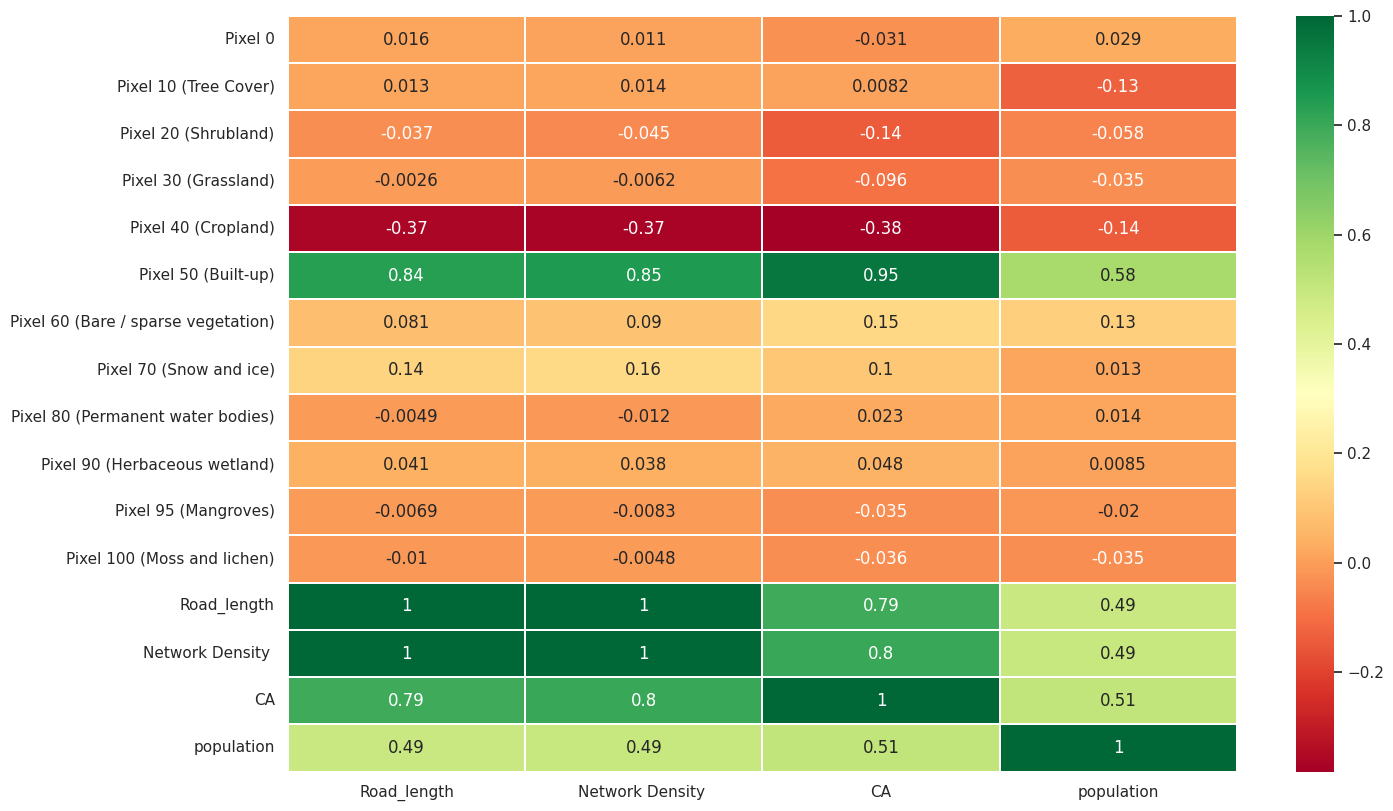

In [88]:
# sns.heatmap(matrix, annot=True, linewidths=10)
p = sns.heatmap(rev_matrix, annot=True, linewidths=0.3, cmap='RdYlGn')
pl = p.get_figure()
pl.tight_layout()
# pl.set_size_inches(dim)
# pl.savefig(img_name)

In [90]:
rev_matrix

,Road_length,Network Density,CA,population
Pixel 0,0.016275,0.011341,-0.030697,0.028991
Pixel 10 (Tree Cover),0.013276,0.013798,0.008179,-0.131842
Pixel 20 (Shrubland),-0.036864,-0.044710,-0.140446,-0.058446
Pixel 30 (Grassland),-0.002615,-0.006229,-0.096195,-0.034606
Pixel 40 (Cropland),-0.365610,-0.367989,-0.382605,-0.140485
Pixel 50 (Built-up),0.836751,0.851642,0.954586,0.575681
Pixel 60 (Bare / sparse vegetation),0.081210,0.089739,0.146998,0.125604
Pixel 70 (Snow and ice),0.140272,0.155860,0.101260,0.012568
Pixel 80 (Permanent water bodies),-0.004874,-0.011811,0.023070,0.013688
Pixel 90 (Herbaceous wetland),0.041002,0.037853,0.047859,0.008511


In [91]:
rev_matrix.to_csv('./new_csv_files/relevant_matrix.csv', sep=',')

In [92]:
matrix.to_csv('./new_csv_files/matrix.csv', sep=',', index=False)

In [93]:
final_df.to_csv('./new_csv_files/data.csv', sep=',', index=False)